In [1]:
# Import the random forest model from sklearn
from sklearn.ensemble import RandomForestClassifier

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split




In [3]:
from sklearn.metrics import classification_report,accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix

In [4]:
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_recall_curve

In [5]:
import matplotlib.pyplot as plt

In [6]:
from sklearn.metrics import roc_auc_score

In [7]:
 from sklearn.model_selection import GridSearchCV

In [8]:
#Import Data
data=pd.read_csv("creditcard_sampledata_2.csv")

In [9]:
data.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,221547,-1.191668,0.428409,1.640028,-1.848859,-0.870903,-0.204849,-0.385675,0.352793,-1.098301,...,0.507173,1.292565,-0.467752,1.244887,0.697707,0.059375,-0.319964,-0.017444,27.44,0
1,184524,1.966614,-0.450087,-1.228586,0.142873,-0.150627,-0.543590,-0.076217,-0.108390,0.973310,...,0.124055,0.564916,-0.039331,-0.283904,0.186400,0.192932,-0.039155,-0.071314,35.95,0
2,91201,1.528452,-1.296191,-0.890677,-2.504028,0.803202,3.350793,-1.633016,0.815350,-1.884692,...,-0.412088,-1.017485,0.129566,0.948048,0.287826,-0.396592,0.042997,0.025853,28.40,0
3,26115,-0.774614,1.100916,0.679080,1.034016,0.168633,0.874582,0.209454,0.770550,-0.558106,...,0.011158,0.146017,-0.130401,-0.848815,0.005698,-0.183295,0.282940,0.123856,43.20,0
4,201292,-1.075860,1.361160,1.496972,2.242604,1.314751,0.272787,1.005246,0.132932,-1.558317,...,0.254485,0.530692,-0.651119,0.626389,1.040212,0.249501,-0.146745,0.029714,10.59,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7300 entries, 0 to 7299
Data columns (total 31 columns):
Unnamed: 0    7300 non-null int64
V1            7300 non-null float64
V2            7300 non-null float64
V3            7300 non-null float64
V4            7300 non-null float64
V5            7300 non-null float64
V6            7300 non-null float64
V7            7300 non-null float64
V8            7300 non-null float64
V9            7300 non-null float64
V10           7300 non-null float64
V11           7300 non-null float64
V12           7300 non-null float64
V13           7300 non-null float64
V14           7300 non-null float64
V15           7300 non-null float64
V16           7300 non-null float64
V17           7300 non-null float64
V18           7300 non-null float64
V19           7300 non-null float64
V20           7300 non-null float64
V21           7300 non-null float64
V22           7300 non-null float64
V23           7300 non-null float64
V24           7300 non-null flo

In [11]:
X=data.drop(["Class","Unnamed: 0"],axis=1)

In [12]:
y=data['Class']

In [13]:
# Split your data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
y.value_counts()

0    7000
1     300
Name: Class, dtype: int64

In [14]:
###Simple Model

In [15]:
# Define the model as the random forest
model = RandomForestClassifier(random_state=5)

In [16]:
# Fit the model to our training set
model.fit(X_train, y_train)

# Obtain predictions from the test data 
predicted = model.predict(X_test)

In [17]:
# Print the accuracy performance metric
print(accuracy_score(predicted, y_test))

0.991324200913242


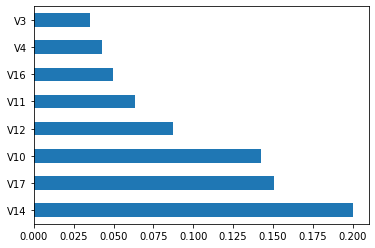

In [18]:
####Plot Important features

feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

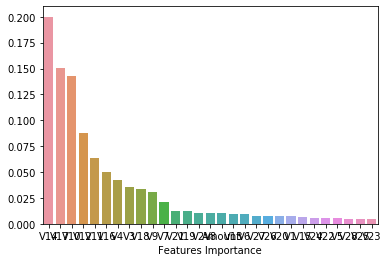

In [19]:
import seaborn as sn
#Alternative Plot Imortant features
featureImportances = pd.Series(model.feature_importances_,index=X_train.columns).sort_values(ascending=False)
#print(featureImportances)
#n=featureImportances.index[0:8]

#sn.barplot(x=round(featureImportances,2), y=featureImportances)
sn.barplot(x=featureImportances.index, y=featureImportances)
plt.xlabel('Features Importance')
plt.show()

In [20]:
featureImportances.index[0:5]

Index(['V14', 'V17', 'V10', 'V12', 'V11'], dtype='object')

In [21]:
#This time, we know accuracy can be misleading in the case of fraud detection.
#With highly imbalanced fraud data, the AUROC curve is a more reliable performance metric, used to compare different classifiers.
#Moreover, the classification report tells you about the precision and recall of your model, 
#whilst the confusion matrix actually shows how many fraud cases you can predict correctly. 
#So let's get these performance metrics.

In [22]:
# Obtain the predictions from our random forest model 
predicted = model.predict(X_test)



In [23]:
# Predict probabilities
probs = model.predict_proba(X_test)

# Print the ROC curve, classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1])) #AUROC SCore
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

0.9697317927427505
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  18   73]]


In [24]:
#you can also plot a Precision-Recall curve, to investigate the trade-off between the two in your model.
#In this curve Precision and Recall are inversely related; as Precision increases, Recall falls and vice-versa.
#A balance between these two needs to be achieved in your model,

# Calculate average precision and the PR curve
average_precision = average_precision_score(y_test, predicted)
print(average_precision)

0.7995764694394831


In [25]:
# Obtain precision and recall
precision, recall, _ = precision_recall_curve(y_test, predicted)



In [26]:
import matplotlib.pyplot as plt
def plot_pr_curve(y, p):
    precision, recall, _ = precision_recall_curve(y, p)

    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0]) 

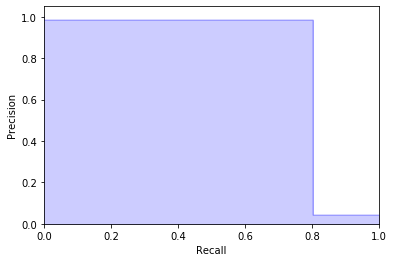

In [27]:
# Plot the recall precision tradeoff
plot_pr_curve(y_test, predicted)

In [ ]:
#Model adjustments
#A simple way to adjust the random forest model to deal with highly imbalanced fraud data,
#is to use the class_weights
#class_weight{“balanced”, “balanced_subsample”}, By deafault weight for all class is one
#Weights associated with classes in the form {class_label: weight}
#The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
#The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.
#Class weight for positive class = (No. of datapoints in dataset-1)/(Total datapoints)
#Class weight for negative class = (No. of datapoints in dataset-2)/(Total datapoints))
#class_weights is used to provide a weight or bias for each output class. 
#This means you should pass a weight for each class that you are trying to classify.Assign more weight to low class

In [32]:
#from sklearn.utils import class_weight
#import numpy as np
#weights = class_weight.compute_class_weight('balanced',
 #                                              np.unique(y_train),
  #                                               y_train)
#print(weights)

[ 0.52132218 12.22488038]


In [46]:
# Define the model with balanced subsample
model = RandomForestClassifier(class_weight='balanced_subsample', random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

# Print the roc_auc_score, the classification report and confusion matrix
print(roc_auc_score(y_test, probs[:,1]))
print(classification_report(y_test, predicted))
print(confusion_matrix(y_test, predicted))

C:\Users\n.kumar.soni\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9463271364176556
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.99      0.80      0.88        91

    accuracy                           0.99      2190
   macro avg       0.99      0.90      0.94      2190
weighted avg       0.99      0.99      0.99      2190

[[2098    1]
 [  18   73]]


In [56]:
import numpy as np
def get_model_results(X_train, y_train, X_test, y_test, model):
    model.fit(X_train, y_train)
    predicted = model.predict(X_test)
    probs = model.predict_proba(X_test)

    #print(f"R2: {r2_score(y_test, predicted):0.3f}")
    print(f"Roc_Auc: {roc_auc_score(y_test, probs[:,1]):0.3f}\n")
    
    print('Classifcation report:\n', classification_report(y_test, predicted))
    #conf_mat = confusion_matrix(y_test, predicted)
    #print('Confusion matrix:\n', conf_mat)
    class_names = np.array(['Non-Fraud', 'Fraud'])
    #myML_functions.plot_confusion_matrix(y_test, predicted, classes=class_names)
    #plt.show()

In [57]:
#Adjusting your Random Forest to fraud detection
# Change the model options
# Change the model options
#Assign weight in whole number.class_weight={0:1, 1:12} means weight of 0.8 to 0
model = RandomForestClassifier(bootstrap=True, class_weight={0:1, 1:12}, criterion='entropy',
                               
# Change depth of model
            max_depth=10, 
                               
# Change the number of samples in leaf nodes
            min_samples_leaf=10, 
                               
# Change the number of trees to use
            n_estimators=20, n_jobs=-1, random_state=5)

# Run the function get_model_results
get_model_results(X_train, y_train, X_test, y_test, model)

Roc_Auc: 0.958

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.94      0.84      0.88        91

    accuracy                           0.99      2190
   macro avg       0.97      0.92      0.94      2190
weighted avg       0.99      0.99      0.99      2190



In [59]:
#GridSearchCV to find optimal parameters
# Define the parameter sets to test
param_grid = {'n_estimators': [1, 30], 'max_features': ['auto', 'log2'], 'max_depth': [4, 8], 'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)

# Combine the parameter sets with the defined model
CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

# Fit the model to our training data and obtain best parameters
CV_model.fit(X_train, y_train)
CV_model.best_params_


{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 30}

In [60]:
# Input the optimal parameters in the model
model = RandomForestClassifier(class_weight={0:1,1:12}, criterion='gini',
            max_depth=8, max_features='log2', min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)

# Get results from your model
get_model_results(X_train, y_train, X_test, y_test, model)

Roc_Auc: 0.965

Classifcation report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2099
           1       0.96      0.82      0.89        91

    accuracy                           0.99      2190
   macro avg       0.98      0.91      0.94      2190
weighted avg       0.99      0.99      0.99      2190



In [ ]:
#The report shows the main classification metrics precision, recall and f1-score on a per-class basis
#The metrics are calculated by using true and false positives, true and false negatives. Positive and negative in this case are generic names for the predicted classes.


In [61]:
####Ensemblig
# Define the Logistic Regression model with weights
model = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)

# Get the model results
get_model_results(X_train, y_train, X_test, y_test, model)

NameError: name 'LogisticRegression' is not defined

In [62]:
# Import the package
from sklearn.ensemble import VotingClassifier

# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1, 1:15}, random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1, 1:12}, criterion='gini', max_depth=8, max_features='log2',
                              min_samples_leaf=10, n_estimators=30, n_jobs=-1, random_state=5)
clf3 = DecisionTreeClassifier(random_state=5, class_weight="balanced")

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Get the results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

NameError: name 'LogisticRegression' is not defined

In [63]:
# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], voting='soft', weights=[1, 4, 1], flatten_transform=True)

# Get results 
get_model_results(X_train, y_train, X_test, y_test, ensemble_model)

NameError: name 'clf1' is not defined

In [40]:
##Check
#y1=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,2,2]

#we= class_weight.compute_class_weight('balanced',
 #                                              np.unique(y1),
  #                                               y1)
#print(we)

[0.41666667 2.66666667 4.44444444]


C:\Users\n.kumar.soni\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=[0 1 2], y=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
